In [1]:
# ----- LIBS

# systems access
import os 

# data analysis
import numpy as np
import pandas as pd

# charts
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as mlines

# geoprocessing
import folium
from folium import plugins
import geopandas as gpd
from shapely.geometry import Point

# Roteiro

- Análise de simulação
    - Posicionamento e SF
    - Métricas da camada PHY
    - Cobertura/Alcance Lora
    - Métricas de performance da rede completa (Mac Layer)
    - Métricas de Consumo\
    
    
- Análise entre simulações
    - variação de Payload
    - variação de appPeriod
    - variação de nº de nós

# Análise de simulação

In [42]:
current_path = os.getcwd()
current_path = '/home/wasp/Desktop/Mestrado/ns3-bmap/NS3/lorawan-metricas-exp/'

In [93]:
# SET NUMBER OF SIMULATION REPEAT
NUM_SIM_REPEAT = 10

# SET NUMBER OF NODES
NUM_NODES = 222

# SET simulation_folder path and simulation_id
simulation_folder = current_path + "/simulations"
simulation_id = "/05-log/"

# SET FILES TO BE ANALYSE
sf_distribution_on_network = "network_position.txt"
phy_layer_packet_outcome = "phy_results.txt"
phy_layer_rssi_coverage = "rssi_results.txt"
mac_layer_performance_metrics = "net_results.txt"
mac_layer_power_consumption = "energy_results.txt"

## Posicionamento x SF

In [5]:
# ----- DATASET
file_to_be_analysed = sf_distribution_on_network
path_to_simulation = simulation_folder + simulation_id + file_to_be_analysed

net_position_df = pd.read_csv(path_to_simulation, header=None) 
net_position_df.columns = ["nodeId", "posX", "posY", "posZ",
                           "sf", "gwId", "gw_posX", "gw_posY", "gw_posZ", "distance"]

print("\nSHAPE:", net_position_df.shape)
net_position_df.head()


SHAPE: (222, 10)


,nodeId,posX,posY,posZ,sf,gwId,gw_posX,gw_posY,gw_posZ,distance
0,0,1527.410,2180.210,1.5,7,222,1694.97,2141.47,44.9188,177.386
1,1,297.312,1965.810,1.5,7,222,1694.97,2141.47,44.9188,1409.330
2,2,1535.550,1646.180,1.5,7,222,1694.97,2141.47,44.9188,522.123
3,3,1149.490,1831.090,1.5,7,222,1694.97,2141.47,44.9188,629.109
4,4,1186.800,667.866,1.5,7,222,1694.97,2141.47,44.9188,1559.370


In [5]:
# ----- PLOT SIZE SETTINGS

# chart bounds
xMin_bound, xMax_bound = -500, 2000
yMin_bound, yMax_bound = 0, 2500 

# chart figsize
x_figsize, y_figsize = 5, 5


# ----- LEGEND SETTINGS PER PLOT
def set_plots_legends():
   
    # legend list settings
    plots_legends = []
       
    # ED points
    colors = ['y','orange', 'green', 'blue', 'purple', 'black']
    for sf in range(len(colors)):
        scatter_lgd = mlines.Line2D([], [], color = 'white', marker = 'o',  markeredgecolor = colors[sf],
                                  markeredgewidth = 0.5, markerfacecolor = colors[sf], markersize = 7, 
                                  label = 'SF' + str(sf + 7))
        plots_legends.append(scatter_lgd)
    
    
    # GW points
    scatter_lgd = mlines.Line2D([], [], color = 'white', marker = (5,2), markeredgecolor = 'red',
                                  markeredgewidth = 0.5, markerfacecolor = 'red', markersize = 15, 
                                  label = 'GW')
    plots_legends.append(scatter_lgd)
    
    return plots_legends

In [6]:
# ----- EDs LISTS per SF

# to initialize multiple lists
eds_x_sf7, eds_y_sf7, eds_x_sf8, eds_y_sf8 = ([] for i in range(4))
eds_x_sf9, eds_y_sf9, eds_x_sf10, eds_y_sf10 = ([] for i in range(4))
eds_x_sf11, eds_y_sf11, eds_x_sf12, eds_y_sf12 = ([] for i in range(4))


for i in range (len(net_position_df)):
    if net_position_df.iloc[i].sf == 7.0:
        eds_x_sf7.append(net_position_df.iloc[i].posX)
        eds_y_sf7.append(net_position_df.iloc[i].posY)
    if net_position_df.iloc[i].sf == 8.0:
        eds_x_sf8.append(net_position_df.iloc[i].posX)
        eds_y_sf8.append(net_position_df.iloc[i].posY)
    if net_position_df.iloc[i].sf == 9.0:
        eds_x_sf9.append(net_position_df.iloc[i].posX)
        eds_y_sf9.append(net_position_df.iloc[i].posY)
    if net_position_df.iloc[i].sf == 10.0:
        eds_x_sf10.append(net_position_df.iloc[i].posX)
        eds_y_sf10.append(net_position_df.iloc[i].posY)
    if net_position_df.iloc[i].sf == 11.0:
        eds_x_sf11.append(net_position_df.iloc[i].posX)
        eds_y_sf11.append(net_position_df.iloc[i].posY)
    if net_position_df.iloc[i].sf == 12.0:
        eds_x_sf12.append(net_position_df.iloc[i].posX)
        eds_y_sf12.append(net_position_df.iloc[i].posY)

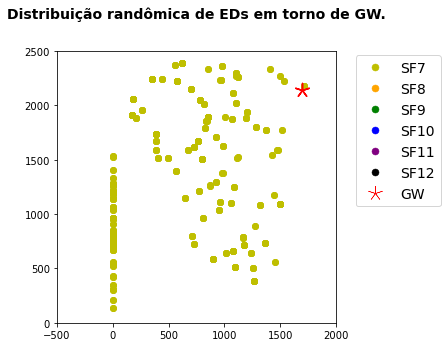

In [7]:
# ----- PLOT ED E GW

# plot initialize
fig, ax = plt.subplots(figsize=(x_figsize, y_figsize))

# draw ED posxy per SF 
ax.scatter(eds_x_sf7, eds_y_sf7, color='y', label ='SF7')
ax.scatter(eds_x_sf8, eds_y_sf8, color='orange', label ='SF8')
ax.scatter(eds_x_sf9, eds_y_sf9, color='green', label ='SF9')
ax.scatter(eds_x_sf10, eds_y_sf10, color='blue', label ='SF10')
ax.scatter(eds_x_sf11, eds_y_sf11, color='purple', label ='SF11')
ax.scatter(eds_x_sf12, eds_y_sf12, color='black', label ='SF10')

# draw GW
ax.scatter(net_position_df.iloc[0].gw_posX, net_position_df.iloc[0].gw_posY, color='red', label ='GW', marker = (5,2), s = 200)
        
# legend settings
legends_list = set_plots_legends()
ax.legend(handles=[line for line in legends_list], loc="upper right", bbox_to_anchor=(1.4, 1.01), prop={'size': 14})

# chart bounds
ax.set(xlim=(xMin_bound, xMax_bound), ylim = (yMin_bound, yMax_bound))

# Title
ax.set_title('Distribuição randômica de EDs em torno de GW.', fontweight='bold', fontsize=14, y=1.1)
plt.show()
fig.savefig('dist_rand_ed_gw.png',bbox_inches='tight')

## Métricas da camada PHY

In [8]:
# ----- DATASET
file_to_be_analysed = phy_layer_packet_outcome
path_to_simulation = simulation_folder + simulation_id + file_to_be_analysed

phy_df = pd.read_csv(path_to_simulation, header=None) 
phy_df.columns = ["gwID", "received", "interfered", "noMoreReceivers", "underSensitivity", "lost"]

print("\nSHAPE:", phy_df.shape)
phy_df.head(10)


SHAPE: (10, 6)


,gwID,received,interfered,noMoreReceivers,underSensitivity,lost
0,0,4388,0,0,0,0
1,0,131629,11,0,0,0
2,0,131549,91,0,0,0
3,0,131640,0,0,0,0
4,0,131640,0,0,0,0
5,0,131538,102,0,0,0
6,0,131553,87,0,0,0
7,0,131640,0,0,0,0
8,0,131426,214,0,0,0
9,0,131640,0,0,0,0


In [9]:
# Valores médios de cada coluna
print("PHY LAYER - Packet Outcome METRICS:\n")
print("received:", phy_df['received'].mean())
print("interfered:", phy_df['interfered'].mean())
print("noMoreReceivers:", phy_df['noMoreReceivers'].mean())
print("underSensitivity:", phy_df['underSensitivity'].mean())
print("lost:", phy_df['lost'].mean())

PHY LAYER - Packet Outcome METRICS:

received: 118864.3
interfered: 50.5
noMoreReceivers: 0.0
underSensitivity: 0.0
lost: 0.0


## Cobertura/Alcance LoRa

In [94]:
# ----- DATASET
file_to_be_analysed = phy_layer_rssi_coverage
path_to_simulation = simulation_folder + simulation_id + file_to_be_analysed

rssi_df = pd.read_csv(path_to_simulation, header=None) 
rssi_df.columns = ["gwId", "nodeId", "RSSI_Sim", "distance_between"]

# print(path)
print("\nSHAPE:", rssi_df.shape)
rssi_df = rssi_df.iloc[0:47]
print("\nSHAPE:", rssi_df.shape)
rssi_df.head()

# TO BE DONE - TIRAR RSSI MEDIO REFERENTE A CADA POSIÇÃO DO DATASET, OBTENDO A COBERTURA MÉDIA TOTAL DE RSSI


SHAPE: (2220, 4)

SHAPE: (47, 4)


,gwId,nodeId,RSSI_Sim,distance_between
0,222,0,-100.852,1803.30
1,222,1,-105.537,2505.14
2,222,2,-100.831,1800.54
3,222,3,-102.072,1964.40
4,222,4,-101.936,1945.82


In [95]:
# Visualizando dataset criado
coletores_df = pd.read_csv("coletores_pos_dataset_elev.csv") 
print("DATASET SHAPE:", coletores_df.shape)
coletores_df.head()

DATASET SHAPE: (47, 9)


,Unnamed: 0,id,name,x,y,z,elevation,latitude,longitude
0,0,1321.0,INOVA,1527.405075,2180.212233,1.5,644.458740,-22.814543,-47.059340
1,1,535.0,BC,297.311734,1965.812273,1.5,602.154968,-22.816324,-47.071348
2,2,802.0,CBMEG,1535.553550,1646.180816,1.5,652.513123,-22.819365,-47.059333
3,3,845.0,CCUEC,1149.489906,1831.086023,1.5,616.788940,-22.817648,-47.063068
4,4,1037.0,GASTROCENTRO,1186.795533,667.866479,1.5,635.025085,-22.828153,-47.062863


In [96]:
rssi_df['latitude'] = coletores_df['latitude']
rssi_df['longitude'] = coletores_df['longitude']
print("DATASET SHAPE:", rssi_df.shape)
rssi_df.head(5)

DATASET SHAPE: (47, 6)


,gwId,nodeId,RSSI_Sim,distance_between,latitude,longitude
0,222,0,-100.852,1803.30,-22.814543,-47.059340
1,222,1,-105.537,2505.14,-22.816324,-47.071348
2,222,2,-100.831,1800.54,-22.819365,-47.059333
3,222,3,-102.072,1964.40,-22.817648,-47.063068
4,222,4,-101.936,1945.82,-22.828153,-47.062863


In [23]:
# rssi_df['latitude'].iloc[0:1].values[0]

In [97]:
heat_data = []
for i in range(rssi_df.shape[0]):
    heat_data.append([
        rssi_df['latitude'].iloc[i:i+1].values[0],
        rssi_df['longitude'].iloc[i:i+1].values[0],
        rssi_df['RSSI_Sim'].iloc[i:i+1].values[0]
    ])

# print(heat_data)

In [98]:
#LEGENDA
import branca

legend_html = '''
{% macro html(this, kwargs) %}
<div style="
    position: fixed; 
    bottom: 80px;
    left: 20px;
    width: 150px;
    height: 80px;
    top: 425px;
    z-index:9999;
    font-size:13px;
    ">
    <p><a style="margin-left:10px;"><b>RSSI (Dbm)</a></b></p>
    <p><a style="color:#2652ca;font-size:150%;margin-left:20px;">&diams;</a>&emsp;<b>[0, -80]</b></p>
    <p><a style="color:#338dff;font-size:150%;margin-left:20px;">&diams;</a>&emsp;<b>[-81, -100]</b></p>
    <p><a style="color:#33c1ff;font-size:150%;margin-left:20px;">&diams;</a>&emsp;<b>[-101, -150]</b></p>
</div>
<div style="
    position: fixed; 
    bottom: 30px;
    left: 20px;
    width: 150px;
    height: 140px; 
    z-index:9998;
    font-size:14px;
    background-color: #ffffff;
    border:2px solid grey;
    opacity: 0.9;
    ">
</div>
{% endmacro %}
'''
legend = branca.element.MacroElement()
legend._template = branca.element.Template(legend_html)

In [99]:
# # ---- UNICAMP DYNAMIC PLOT MAP & MARKERS OF POSITIONS THAT PACKET WERE RECEIVE

# create folium map
fmap = folium.Map(width= 500,height=600,location=[-22.822617, -47.067], zoom_start=15, tiles='OpenStreetMap')

# add markers
for data in heat_data:
  lat, lng, rssi = data[0], data[1], data[2]
#   print(lat, lng)
#   print('RSSI', rssi)
  if rssi >= -80:
        color_rssi = 'darkblue'
  elif rssi < -80 and rssi >= -100:
        color_rssi = 'blue'
  elif rssi < -100:
        color_rssi = "lightblue"

  folium.Marker(
      location=[float(lat), float(lng)],
      popup="Lat: " + str(lat) + ", Lng: " + str(lng)+ ", Rssi: " + str(rssi),
      icon=folium.Icon(color=color_rssi),
  ).add_to(fmap)

fmap.get_root().add_child(legend)

fmap

In [17]:
# # salve map
# fn="okumura_elev.html"
# fmap.save(fn)

## Métricas de performance da rede completa (Mac Layer)

In [62]:
# ----- DATASET
file_to_be_analysed = mac_layer_performance_metrics
path_to_simulation = simulation_folder + simulation_id + file_to_be_analysed

net_df = pd.read_csv(path_to_simulation, header=None) 
net_df.columns = ["nSent", "nReceiv", "PER", "PLR", "PDR"]

print("\nSHAPE:", net_df.shape)
net_df.head()


SHAPE: (1, 5)


,nSent,nReceiv,PER,PLR,PDR
0,126000,125906,0.000747,0.000746,0.999254


In [63]:
# Valores médios de cada coluna
print("NETWORK PERFORMANCE METRICS:\n")
print("nSent:", net_df['nSent'].mean())
print("nReceiv:", net_df['nReceiv'].mean())
print("\nPER:", net_df['PER'].mean())
print("PLR:", net_df['PLR'].mean())
print("PDR:", net_df['PDR'].mean())

NETWORK PERFORMANCE METRICS:

nSent: 126000.0
nReceiv: 125906.0

PER: 0.000746589
PLR: 0.000746032
PDR: 0.999254


## Métricas de Consumo

In [34]:
# ----- DATASET
file_to_be_analysed = mac_layer_power_consumption
path_to_simulation = simulation_folder + simulation_id + file_to_be_analysed

energy_df = pd.read_csv(path_to_simulation, header=None) 
energy_df.columns = ["time", "energyRemaining"]

# energy_df = energy_df.iloc[0:720]
print("\nSHAPE:", energy_df.shape)
energy_df.head()


SHAPE: (24, 2)


,time,energyRemaining
0,0,10000.00
1,3600,6083.19
2,7200,2167.18
3,10800,0.00
4,14400,0.00


In [35]:
# tempo para hora
energy_df['time_h'] = energy_df['time'] / 3600.0
print("\nSHAPE:", energy_df.shape)

# hora para mês
energy_df['time_mes'] = energy_df['time_h'] / 730
print("\nSHAPE:", energy_df.shape)

# Joules p 100%
total = 10000.0
energy_df['energyRemainingPercentual'] = (energy_df['energyRemaining'] / total) *100
energy_df.head()


SHAPE: (24, 3)

SHAPE: (24, 4)


,time,energyRemaining,time_h,time_mes,energyRemainingPercentual
0,0,10000.00,0.0,0.000000,100.0000
1,3600,6083.19,1.0,0.001370,60.8319
2,7200,2167.18,2.0,0.002740,21.6718
3,10800,0.00,3.0,0.004110,0.0000
4,14400,0.00,4.0,0.005479,0.0000


In [123]:
# energy_df.duplicated()

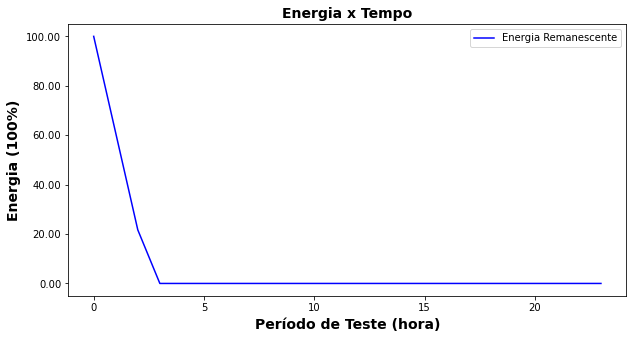

In [36]:
# graph measures x time (h)

fig, ax = plt.subplots(figsize=(10,5))
# plt.figure(figsize=(10,5))
ax = plt.gca()

energy_df.plot(kind='line',x="time_h", y='energyRemainingPercentual',label='Energia Remanescente', color = 'blue', ax=ax)

plt.xlabel('Período de Teste (hora)', fontweight='bold', fontsize=14,labelpad=5)
plt.ylabel('Energia (100%)', fontweight='bold', fontsize=14, labelpad=5)

ttl = ax.title
ttl.set_position([.5, 1.3])

plt.title('Energia x Tempo',fontweight='bold',fontsize=14)

from matplotlib.ticker import FormatStrFormatter
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.show()
fig.savefig('energy_result.png',bbox_inches='tight')

In [51]:
# energy_df.describe()

In [34]:
# totalEnergy = energy_df['energyRemaining'].max()
# energyRemain = energy_df['energyRemaining'].min()
# totalReceivePkts = 94
# print("Total Energy:", totalEnergy)
# print("Energy Remain:", energyRemain)
# print("Total Receive Pkts:", totalReceivePkts)

# NEC = (totalEnergy - energyRemain)/totalReceivePkts
# NEC

# Análise entre simulações

In [21]:
current_path = os.getcwd()
current_path = '/home/wasp/Desktop/Mestrado/ns3-bmap/NS3/lorawan-metricas-exp/'

###  Métricas da camada PHY

In [76]:
# Open Datasets - Camada phy
path_cenario_0 = current_path + "/simulations/04-log/phy_results.txt"
path_cenario_1 = current_path + "/simulations/05-log/phy_results.txt"
path_cenario_2 = current_path + "/simulations/04/phy_results.txt"
path_cenario_3 = current_path + "/simulations/05/phy_results.txt"

cenario_0_df = pd.read_csv(path_cenario_0, header=None) 
cenario_0_df.columns = ["gwID", "received", "interfered", "noMoreReceivers", "underSensitivity", "lost"]
print("\nSHAPE:", cenario_0_df.shape)
# cenario_0_df.head()

cenario_1_df = pd.read_csv(path_cenario_1, header=None) 
cenario_1_df.columns = ["gwID", "received", "interfered", "noMoreReceivers", "underSensitivity", "lost"]
print("SHAPE:", cenario_1_df.shape)
# cenario_1_df.head()

cenario_2_df = pd.read_csv(path_cenario_2, header=None) 
cenario_2_df.columns = ["gwID", "received", "interfered", "noMoreReceivers", "underSensitivity", "lost"]
print("SHAPE:", cenario_2_df.shape)
# cenario_2_df.head()

cenario_3_df = pd.read_csv(path_cenario_3, header=None) 
cenario_3_df.columns = ["gwID", "received", "interfered", "noMoreReceivers", "underSensitivity", "lost"]
print("SHAPE:", cenario_3_df.shape)


SHAPE: (10, 6)
SHAPE: (10, 6)
SHAPE: (10, 6)
SHAPE: (10, 6)


In [30]:
cenario_0_df['received'].mean()

131625.4

In [77]:
# REMOVE OUTLIERS
cenario_2_df = cenario_2_df.iloc[1:].head()

In [78]:
def percent_conversion (total_pkg_expected, number):
    percent = (100 * number)/total_pkg_expected
    return percent

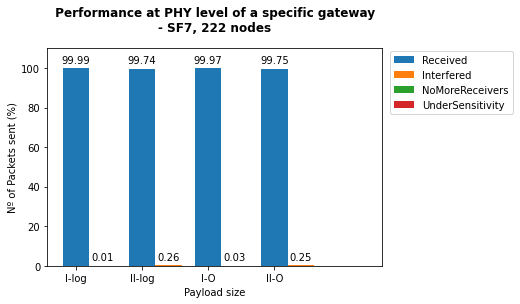

In [79]:
# labels = ['1 ano', '30d - 30min', '30d -10min'] 
labels = ['I-log', 'II-log', 'I-O', 'II-O'] 

total_pkg_01 = 131640
total_pkg_02 = 823680
total_pkg_03 = 131640
total_pkg_04 = 823680

received = [percent_conversion(total_pkg_01, cenario_0_df['received'].mean()),
            percent_conversion(total_pkg_02, cenario_1_df['received'].mean()),
            percent_conversion(total_pkg_03, cenario_2_df['received'].mean()),
            percent_conversion(total_pkg_04, cenario_3_df['received'].mean())]

interfered = [percent_conversion(total_pkg_01, cenario_0_df['interfered'].mean()),
              percent_conversion(total_pkg_02, cenario_1_df['interfered'].mean()),
              percent_conversion(total_pkg_03, cenario_2_df['interfered'].mean()),
              percent_conversion(total_pkg_04, cenario_3_df['interfered'].mean())]

noMoreReceivers = [percent_conversion(total_pkg_01, cenario_0_df['noMoreReceivers'].mean()),
                   percent_conversion(total_pkg_02, cenario_1_df['noMoreReceivers'].mean()),
                   percent_conversion(total_pkg_03, cenario_2_df['noMoreReceivers'].mean()),
                   percent_conversion(total_pkg_04, cenario_3_df['noMoreReceivers'].mean())]

underSensitivity = [percent_conversion(total_pkg_01, cenario_0_df['underSensitivity'].mean()),
            percent_conversion(total_pkg_01, cenario_1_df['underSensitivity'].mean()),
            percent_conversion(total_pkg_02, cenario_2_df['underSensitivity'].mean()),
            percent_conversion(total_pkg_03, cenario_3_df['underSensitivity'].mean())]


x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, received, width, label='Received')
rects2 = ax.bar(x + width, interfered, width, label='Interfered')
rects3 = ax.bar(x + width*2, noMoreReceivers, width, label='NoMoreReceivers')
rects4 = ax.bar(x + width*3, underSensitivity, width, label='UnderSensitivity')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Nº of Packets sent (%)')
ax.set_xlabel('Payload size')
ax.set_title(' Performance at PHY level of a specific gateway \n- SF7, 222 nodes', fontweight='bold', fontsize=12, y=1.05)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0, 110]) 
ax.legend(bbox_to_anchor=(1.01, 1.01), prop={'size': 10})


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)


plt.show()
fig.savefig('phy_performance.png',bbox_inches='tight')

## Métricas de performance da rede completa (Mac Layer)

In [97]:
# ----- Open Datasets - Camada MAC

file = "net_results.txt"
path_cenario_0 = current_path + "/simulations/04-log/" + file
path_cenario_1 = current_path + "/simulations/05-log/" + file
path_cenario_2 = current_path + "/simulations/04/" + file
path_cenario_3 = current_path + "/simulations/05/" + file

net_0_df = pd.read_csv(path_cenario_0, header=None) 
net_0_df.columns = ["nSent", "nReceiv", "PER", "PLR", "PDR"]
print("\nSHAPE:", net_0_df.shape)
# net_0_df.head()

net_1_df = pd.read_csv(path_cenario_1, header=None) 
net_1_df.columns = ["nSent", "nReceiv", "PER", "PLR", "PDR"]
print("SHAPE:", net_1_df.shape)
net_1_df.head()

net_2_df = pd.read_csv(path_cenario_2, header=None) 
net_2_df.columns = ["nSent", "nReceiv", "PER", "PLR", "PDR"]
print("SHAPE:", net_2_df.shape)
net_2_df.head()

net_3_df = pd.read_csv(path_cenario_3, header=None) 
net_3_df.columns = ["nSent", "nReceiv", "PER", "PLR", "PDR"]
print("SHAPE:", net_3_df.shape)
net_3_df.head()


SHAPE: (10, 5)
SHAPE: (10, 5)
SHAPE: (10, 5)
SHAPE: (10, 5)


,nSent,nReceiv,PER,PLR,PDR
0,823680,818521,0.006303,0.006263,0.993737
1,823680,821454,0.002710,0.002703,0.997297
2,823680,820647,0.003696,0.003682,0.996318
3,823680,820275,0.004151,0.004134,0.995866
4,823680,822063,0.001967,0.001963,0.998037


In [99]:
#REMOVE OUTLIERS
net_2_df = net_2_df.iloc[1:].head()

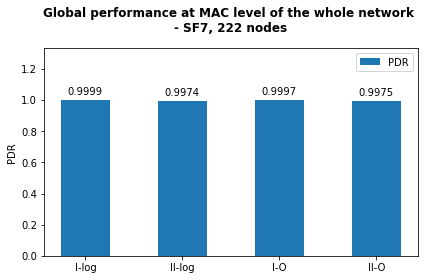

In [100]:
# labels = ['1 ano', '30d - 30min', '30d -10min'] 
labels = ['I-log', 'II-log', 'I-O', 'II-O'] 

pdr = [net_0_df['PDR'].mean(), net_1_df['PDR'].mean(), net_2_df['PDR'].mean(), net_3_df['PDR'].mean()]

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, pdr, width, label='PDR')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('PDR')
ax.set_title('Global performance at MAC level of the whole network \n- SF7, 222 nodes', fontweight='bold', fontsize=12, y=1.05)
ax.set_xticks(x)
ax.set_xticklabels(labels)
# ax.set_xlim([0, 1]) 
ax.set_ylim([0, max(pdr) + max(pdr)/3]) 
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height,4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)


fig.tight_layout()

plt.show()
fig.savefig('mac_performance.png',bbox_inches='tight')

In [101]:
# ----- Open Datasets - Camada Delay

file = "delay_results.txt"
path_cenario_0 = current_path + "/simulations/04-log/" + file
path_cenario_1 = current_path + "/simulations/05-log/" + file
path_cenario_2 = current_path + "/simulations/04/" + file
path_cenario_3 = current_path + "/simulations/05/" + file

delay_0_df = pd.read_csv(path_cenario_0, header=None) 
# Average delay (ms),  Average delay (ns) per SF, soma dos Delays per SF (ns):
delay_0_df.columns = ["sent", "receive", "average_delay_s", "average_delay_ns", "delay_p_sf_ns"]
print("\nSHAPE:", net_0_df.shape)
# delay_0_df.head()

delay_1_df = pd.read_csv(path_cenario_1, header=None) 
delay_1_df.columns = ["sent", "receive", "average_delay_s", "average_delay_ns", "delay_p_sf_ns"]
print("SHAPE:", delay_1_df.shape)
# delay_1_df.head()

delay_2_df = pd.read_csv(path_cenario_2, header=None) 
delay_2_df.columns = ["sent", "receive", "average_delay_s", "average_delay_ns", "delay_p_sf_ns"]
print("SHAPE:", delay_2_df.shape)
# delay_2_df.head()

delay_3_df = pd.read_csv(path_cenario_3, header=None) 
delay_3_df.columns = ["sent", "receive", "average_delay_s", "average_delay_ns", "delay_p_sf_ns"]
print("SHAPE:", delay_3_df.shape)


SHAPE: (10, 5)
SHAPE: (10, 5)
SHAPE: (10, 5)
SHAPE: (10, 5)


In [40]:
# delay_2_df['average_delay_s'].mean()

In [102]:
# REMOVE OUTLIERS
net_2_df = net_2_df.iloc[1:]
net_2_df.head()

,nSent,nReceiv,PER,PLR,PDR
2,131640,131549,0.000692,0.000691,0.999309
3,131640,131640,0.000000,0.000000,1.000000
4,131640,131640,0.000000,0.000000,1.000000
5,131640,131538,0.000775,0.000775,0.999225


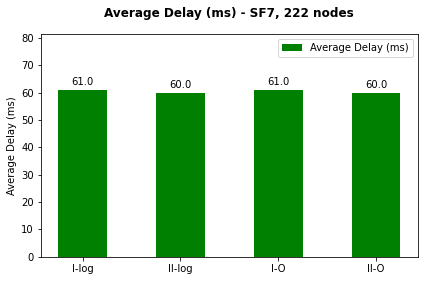

In [103]:
# labels = ['11 bytes', '51 bytes', '222 bytes']
# labels = ['Cenario I', 'Cenario II'] 
labels = ['I-log', 'II-log', 'I-O', 'II-O'] 

delay = [delay_0_df['average_delay_s'].mean(), delay_1_df['average_delay_s'].mean(),
         delay_2_df['average_delay_s'].mean(), delay_3_df['average_delay_s'].mean()]

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, delay, width, label='Average Delay (ms)', color='green')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Delay (ms)')
ax.set_title('Average Delay (ms) - SF7, 222 nodes', fontweight='bold', fontsize=12, y=1.05)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0, max(delay) + max(delay)/3]) 
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height,4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)


fig.tight_layout()

plt.show()
fig.savefig('delay_performance.png',bbox_inches='tight')

# Modelo de Energia

In [38]:
# ----- Open Datasets - Consumo

file = "energy_results.txt"
path_cenario_1 = current_path + "/simulations/06/" + file
path_cenario_2 = current_path + "/simulations/07/" + file
# path_cenario_3 = current_path + "/simulations/04/" + file
# path_cenario_4 = current_path + "/simulations/05/" + file

energy_df_1 = pd.read_csv(path_cenario_1, header=None) 
energy_df_1.columns = ["time", "energyRemaining"]

energy_df_2 = pd.read_csv(path_cenario_2, header=None) 
energy_df_2.columns = ["time", "energyRemaining"]

# energy_df_3 = pd.read_csv(path_cenario_3, header=None) 
# energy_df_3.columns = ["time", "energyRemaining"]

# energy_df_4 = pd.read_csv(path_cenario_4, header=None) 
# energy_df_4.columns = ["time", "energyRemaining"]

# energy_df_1 = energy_df_1.iloc[0:720]
# energy_df_2 = energy_df_2.iloc[0:720]
# energy_df_3 = energy_df_3.iloc[0:720]
# energy_df_4 = energy_df_4.iloc[0:720]
print("\nSHAPE:", energy_df_1.shape)
energy_df_1.head()


SHAPE: (24, 2)


,time,energyRemaining
0,0,10000.00
1,3600,5905.11
2,7200,1810.22
3,10800,0.00
4,14400,0.00


In [39]:
# tempo para hora
energy_df_1['time_h'] = energy_df_1['time'] / 3600.0
print("\nSHAPE:", energy_df_1.shape)

# hora para mês
energy_df_1['time_mes'] = energy_df_1['time_h'] / 730
print("\nSHAPE:", energy_df_1.shape)

# Joules p 100%
total = 10000.0
energy_df_1['energyRemainingPercentual'] = (energy_df_1['energyRemaining'] / total) *100
energy_df_1.head()

# tempo para hora
energy_df_2['time_h'] = energy_df_2['time'] / 3600.0
print("\nSHAPE:", energy_df_2.shape)

# hora para mês
energy_df_2['time_mes'] = energy_df_2['time_h'] / 730
print("\nSHAPE:", energy_df_2.shape)

# Joules p 100%
total = 10000.0
energy_df_2['energyRemainingPercentual'] = (energy_df_2['energyRemaining'] / total) *100
energy_df_2.head()

# # tempo para hora
# energy_df_3['time_h'] = energy_df_3['time'] / 3600.0
# print("\nSHAPE:", energy_df_3.shape)

# # hora para mês
# energy_df_3['time_mes'] = energy_df_3['time_h'] / 730
# print("\nSHAPE:", energy_df_3.shape)

# # Joules p 100%
# total = 10000.0
# energy_df_3['energyRemainingPercentual'] = (energy_df_3['energyRemaining'] / total) *100
# energy_df_3.head()

# # tempo para hora
# energy_df_4['time_h'] = energy_df_4['time'] / 3600.0
# print("\nSHAPE:", energy_df_4.shape)

# # hora para mês
# energy_df_4['time_mes'] = energy_df_4['time_h'] / 730
# print("\nSHAPE:", energy_df_4.shape)

# # Joules p 100%
# total = 10000.0
# energy_df_4['energyRemainingPercentual'] = (energy_df_4['energyRemaining'] / total) *100
# energy_df_4.head()


SHAPE: (24, 3)

SHAPE: (24, 4)

SHAPE: (24, 3)

SHAPE: (24, 4)


,time,energyRemaining,time_h,time_mes,energyRemainingPercentual
0,0,10000.00,0.0,0.000000,100.0000
1,3600,5904.94,1.0,0.001370,59.0494
2,7200,1809.88,2.0,0.002740,18.0988
3,10800,0.00,3.0,0.004110,0.0000
4,14400,0.00,4.0,0.005479,0.0000


In [108]:
#REMOVE OUTLIERS
energy_df_2 = energy_df_2.iloc[:720]
# energy_df_2.head(50)

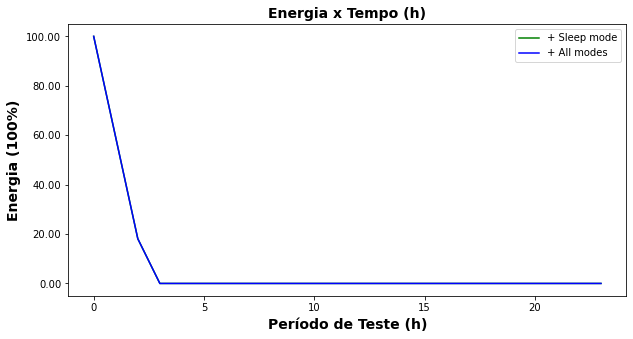

In [41]:
# graph measures x time (h)

fig, ax = plt.subplots(figsize=(10,5))
# plt.figure(figsize=(10,5))
ax = plt.gca()

energy_df_1.plot(kind='line',x="time_h", y='energyRemainingPercentual',label='+ Sleep mode', color = 'green', ax=ax)
energy_df_2.plot(kind='line',x="time_h", y='energyRemainingPercentual',label='+ All modes', color = 'blue', ax=ax)
# energy_df_3.plot(kind='line',x="time_mes", y='energyRemainingPercentual',label='Cenario I-okumura', color = 'red', ax=ax)
# energy_df_4.plot(kind='line',x="time_mes", y='energyRemainingPercentual',label='Cenario II-okumura', color = 'red', ax=ax)


plt.xlabel('Período de Teste (h)', fontweight='bold', fontsize=14,labelpad=5)
plt.ylabel('Energia (100%)', fontweight='bold', fontsize=14, labelpad=5)

ttl = ax.title
ttl.set_position([.5, 1.3])

plt.title('Energia x Tempo (h)',fontweight='bold',fontsize=14)

from matplotlib.ticker import FormatStrFormatter
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.show()
fig.savefig('energy_performance.png',bbox_inches='tight')